In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.plotter import *
from src.filters import *
import math
import pickle
from sklearn.utils import shuffle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from scipy.fft import fftshift

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
meepo1004 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/1004')
meepo1004.process()
meepo1017 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/1017')
meepo1017.process()
meepo1010 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/1010')
meepo1010.process()
meepo0923 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/control-intact-923')
meepo0923.process()

read from t=0s to t=246.43s
read from t=0s to t=298.5s
read from t=0s to t=307.79s
read from t=0s to t=321.67s
read from t=0s to t=281.53s
read from t=0s to t=334.57s
read from t=0s to t=212.6s
read from t=0s to t=210.65s
read from t=0s to t=191.82s
read from t=0s to t=332.12s
read from t=0s to t=323.65s


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [40., 40., 40., ..., 20., 20.,  0.],
        [20.,  0., 20., ...,  0.,  0.,  0.],
        [ 0., 20.,  0., ...,  0., 40.,  0.]]),
 array([[ 38.29582169,  58.41496512,  90.56500631, ...,  94.38486094,
          77.8180818 , 123.39847814],
        [ 25.78291026,  45.06900024,  85.98348513, ...,  93.26505758,
          88.31527571, 122.49840454],
        [ 29.20849446,  43.43933917,  88.9360202 , ...,  92.13224368,
          82.87385049, 133.43513483],
        ...,
        [ 41.31546757,  44.65358762,  82.80052769, ...,  60.83293864,
          81.75379425, 100.81242085],
        [ 47.6744851 ,  39.88101671,  85.74444867, ...,  65.10559843,
          74.64518019, 103.58403218],
        [ 57.60359322,  41.10275838,  92.43482237, ...,  69.93302927,
          66.82392577, 105.43090996]]))

Initial r2:0.06086628511715751 control:0.2075101634095275 test:0.17530586312881563


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
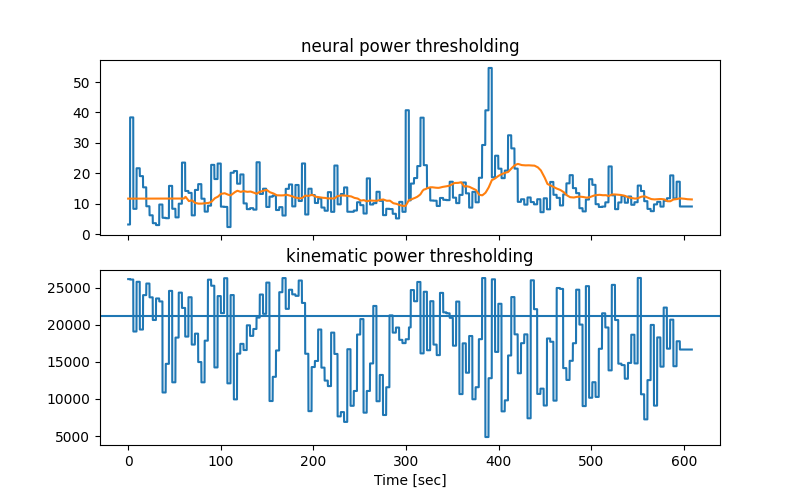

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
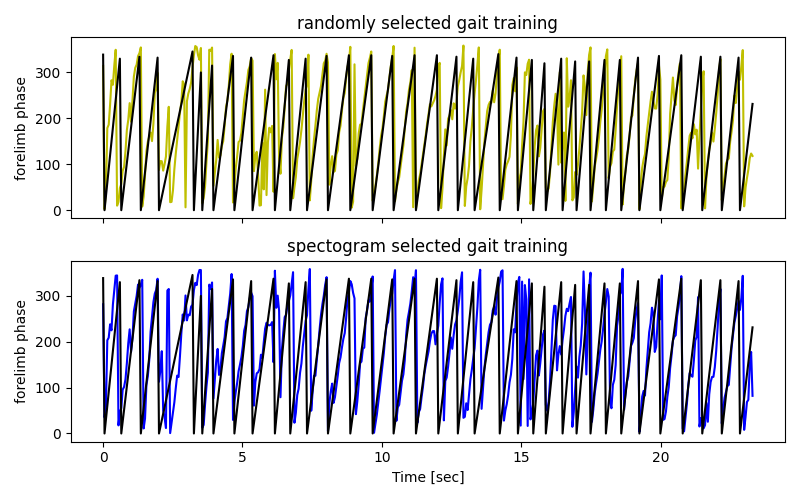

In [3]:
meepo0923.spectrum_training_selector()


Initial r2:0.002236085303464702 control:-0.033081386732624896 test:-0.06308864925870022


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
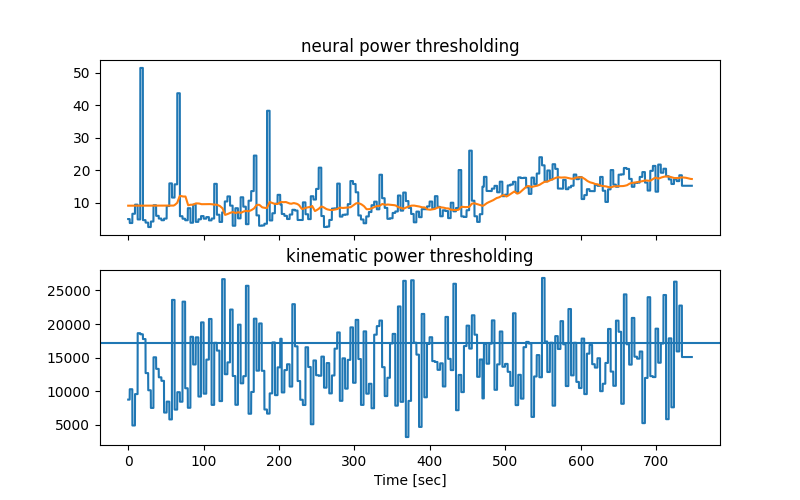

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
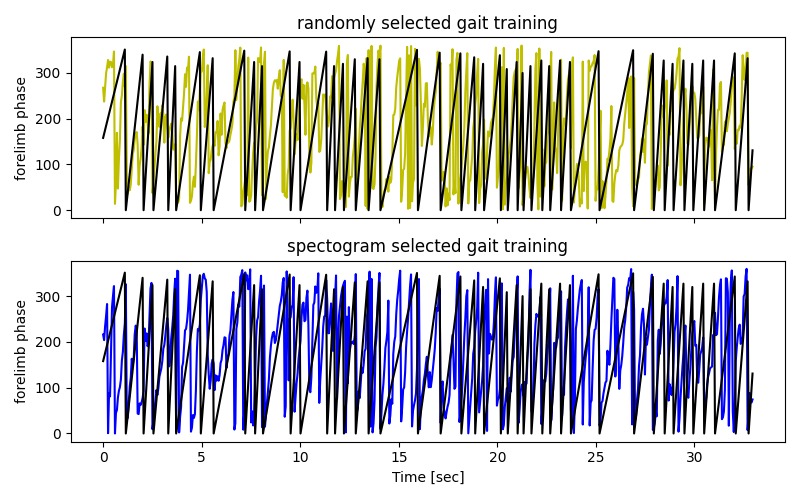

In [4]:
meepo1004.spectrum_training_selector()


Initial r2:-0.0021648127230284087 control:-0.06785564364891658 test:-0.07842424206755255


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
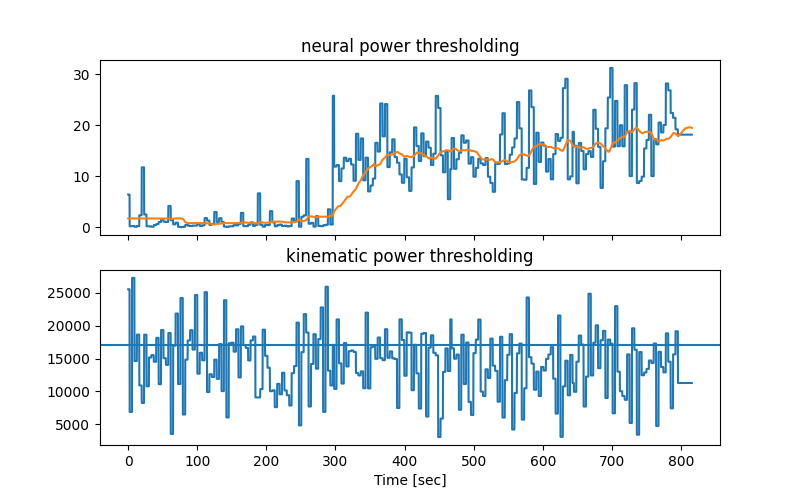

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
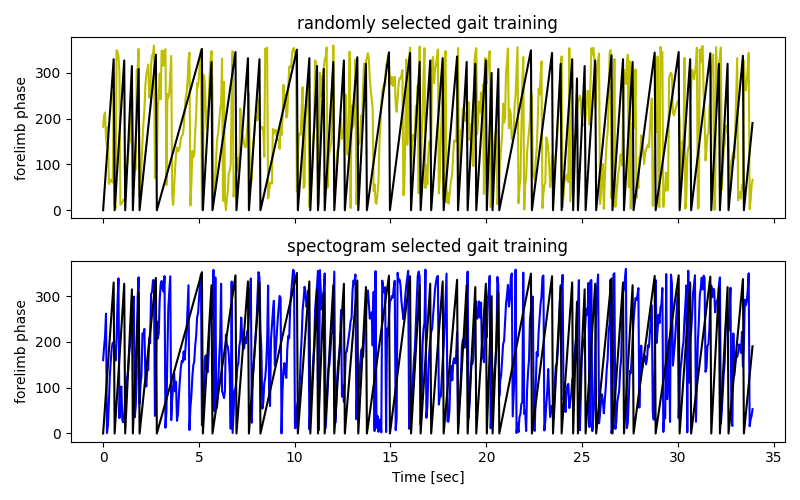

In [5]:
meepo1010.spectrum_training_selector()


Initial r2:0.0010352313692205406 control:-0.05032900865633341 test:-0.11575251782027787


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
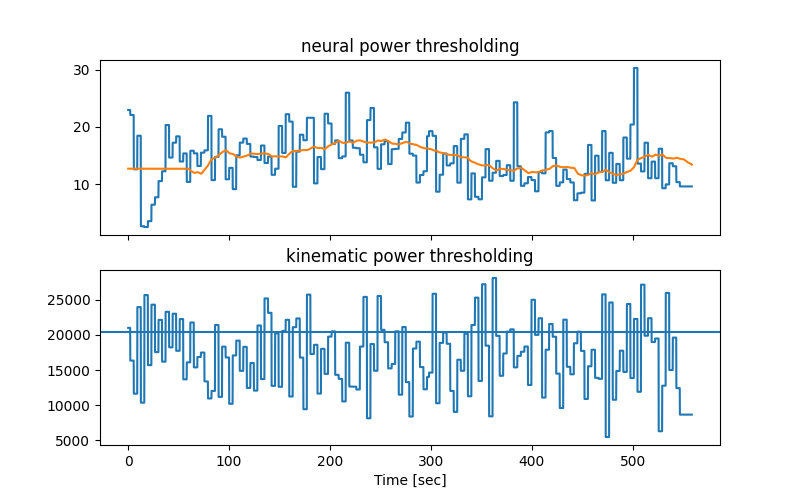

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
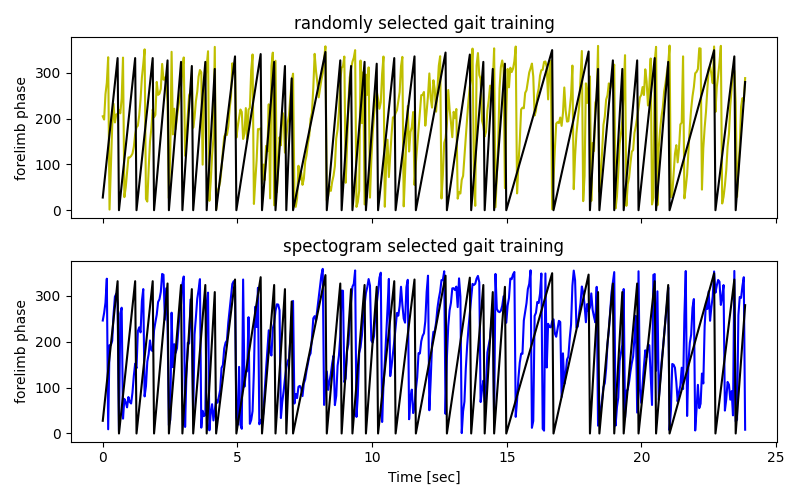

In [6]:
meepo1017.spectrum_training_selector()

Text(0.5, 1.0, 'spike rate spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
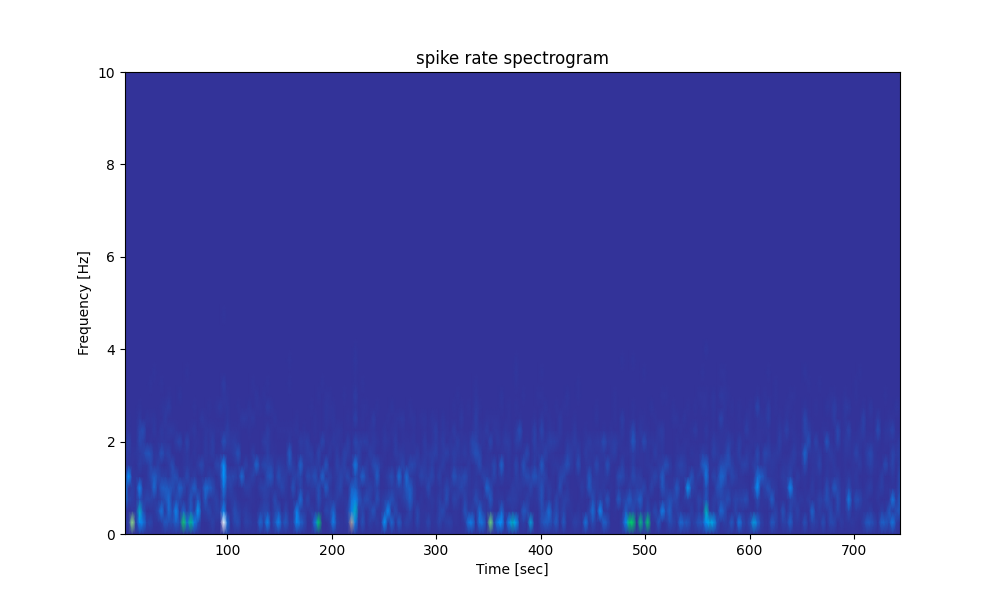

In [81]:
window=4
seconds = window
fs_kin = 20
nperseg_kin = int(seconds*fs_kin)

f_kin6, t_kin6, Sxx_kin6 = signal.spectrogram(angles[:,6], fs = fs_kin, nperseg = nperseg_kin)

fig, (ax2) = plt.subplots(1, 1, figsize=(10,6))
ax2.pcolormesh(t_kin6, f_kin6, Sxx_kin6, cmap = 'terrain', shading='gouraud')
ax2.set_ylim([0,10])
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('spike rate spectrogram')


In [88]:
def spectro121map(rates, angles, angle_number, window = 4):
    tsf = np.linspace(0, (rates.shape[0]*50)/1000,rates.shape[0])
    # '''
    # Sxx_rates, t_rates, f_rates = spectro1(rates, window)
    # Sxx_kin, t_kin, f_kin = spectro1(angles[:,angle_number], window)
    # '''
    Sxx_rates, t_rates, f_rates = meepo1004.spectro1(rates, window)
    seconds = window
    fs_kin = 20
    nperseg_kin = int(seconds*fs_kin)
    f_kin, t_kin, Sxx_kin = signal.spectrogram(angles[:,6], fs = fs_kin, nperseg = nperseg_kin)
    
    #replace the following with a more analytical extraction of the gait_frequency vairable (via PSD of kin):
    # gait_frequency = 1.5
    # gait_upper = gait_frequency + 0.5*gait_frequency
    # gait_lower = gait_frequency - 0.5*gait_frequency
    gait_upper = 2.75
    gait_lower = 1.5


    indexes = np.where(np.logical_and(f_rates >= gait_lower, f_rates <= gait_upper))[0]
    Sxx_stack = np.sum(Sxx_rates[indexes[0]:indexes[-1]+1,:], axis = 0)
    Sxx_kin_stack = np.sum(Sxx_kin[indexes[0]:indexes[-1]+1,:], axis = 0)


    Sxx_stack_volatile = Sxx_stack.copy()
    Sxx_kin_stack_volatile = Sxx_kin_stack.copy()
    time_volatile = t_rates.copy()
    time_volatile2 = t_rates.copy()

    upsampled_Sxx_stack = []
    for i in range(tsf.shape[0]):
        if time_volatile.shape[0] > 1:
            while tsf[i] >= time_volatile[0]:
                time_volatile = time_volatile[1:]
                Sxx_stack_volatile = Sxx_stack_volatile[1:]
        upsampled_Sxx_stack.append(Sxx_stack_volatile[0])
    upsampled_Sxx_stack = np.array(upsampled_Sxx_stack)

    upsampled_kin_Sxx = []
    for i in range(tsf.shape[0]):
        if time_volatile2.shape[0] > 1:
            while tsf[i] >= time_volatile2[0]:
                time_volatile2 = time_volatile2[1:]
                Sxx_kin_stack_volatile = Sxx_kin_stack_volatile[1:]
        upsampled_kin_Sxx.append(Sxx_kin_stack_volatile[0])
    upsampled_kin_Sxx = np.array(upsampled_kin_Sxx)

    return upsampled_Sxx_stack, upsampled_kin_Sxx


def phase_reorganizer(limb_phase, upsampled_Sxx_stack, upsampled_kin_Sxx):
    stitch_rates, stitch_angles = meepo1004.stitch_and_format()
    tsf = np.linspace(0, (rates.shape[0]*50)/1000,rates.shape[0])

    phase_inits = np.where(limb_phase == 0)[0]
    upsampled_zero_hold = np.zeros(limb_phase.shape[0])
    random_zero_hold = np.zeros(limb_phase.shape[0])
    downsampled_zero_hold = np.zeros(phase_inits.shape[0])
    mean_power = 1.2*np.mean(upsampled_Sxx_stack)
    mean_power_kin = 1.2*np.mean(upsampled_kin_Sxx)

    for i in range(phase_inits.shape[0]):
        if phase_inits[i] != phase_inits[-1]:
            gait_power = np.mean(upsampled_Sxx_stack[phase_inits[i]:phase_inits[i+1]])
            if gait_power >= mean_power:
                upsampled_zero_hold[phase_inits[i]:phase_inits[i+1]] = 1
                downsampled_zero_hold[i] = 1
        else:
            gait_power = np.mean(upsampled_Sxx_stack[phase_inits[i]:])
            if gait_power >= mean_power:
                upsampled_zero_hold[phase_inits[i]:] = 1
                downsampled_zero_hold[i] = 1
    shuffled_gait_selections = shuffle(downsampled_zero_hold)
    for i in range(phase_inits.shape[0]):
        if phase_inits[i] != phase_inits[-1]:
            if shuffled_gait_selections[i] == 1:
                random_zero_hold[phase_inits[i]:phase_inits[i+1]] = 1
        else:
            if shuffled_gait_selections[i] == 1:
                random_zero_hold[phase_inits[i]:] = 1

    random_rates = []
    random_angles = []
    for i in range(random_zero_hold.shape[0]):
        if random_zero_hold[i] == 1:
            random_rates.append(stitch_rates[i, :])
            random_angles.append(stitch_angles[i, :])
    random_rates = np.array(random_rates)
    random_angles = np.array(random_angles)

    rebuilt_rates = []
    rebuilt_angles = []
    for i in range(upsampled_zero_hold.shape[0]):
        if upsampled_zero_hold[i] == 1:
            rebuilt_rates.append(stitch_rates[i, :])
            rebuilt_angles.append(stitch_angles[i, :])
    rebuilt_rates = np.array(rebuilt_rates)
    rebuilt_angles = np.array(rebuilt_angles)
    return rebuilt_rates, rebuilt_angles, random_rates, random_angles


def spectrum_training_selector(rate_list, angle_list, angle_number):

# def spectrum_training_selector(self, rates, angles, metric = 'forelimb'):
#     if rates == None and angles == None:
#             rates = self.data['rates']
#             angles = self.data['angles']
    
#     angle_number = self.data['angle_names'].index(angle_name)
    
    
#     decode_phase(rates, angles, metric_angle = metric)
    rate_stack =[]
    for i in range(len(rate_list)):
        rate_stack.append(rate_list[i][9:,:])
    rates = np.vstack(rate_stack)

    angle_stack =[]
    for i in range(len(angle_list)):
        angle_stack.append(angle_list[i][9:,:])
    angles = np.vstack(angle_stack)


    blank, _, first_r2, _, _, _, full_phase_list = meepo1004.decode_phase(rates, angles, metric_angle = 'forelimb')
    upsampled_Sxx_stack, upsampled_kin_Sxx = spectro121map(rates, angles, angle_number)
    rebuilt_rates, rebuilt_angles, random_rates, random_angles = phase_reorganizer(full_phase_list[:,angle_number], upsampled_Sxx_stack, upsampled_kin_Sxx)
    re_h_sin, re_h_cos, test_r2, re_pred_arctans, re_test_arctans,  re_test_rates, re_full_phase_list  = meepo1004.decode_phase(rebuilt_rates, rebuilt_angles, metric_angle = 'forelimb')
    rand_h_sin, rand_h_cos, control_r2, rand_pred_arctans, rand_test_arctans, rand_test_rates, rand_full_phase_list = meepo1004.decode_phase(random_rates, random_angles, metric_angle = 'forelimb')
    rand_sin = predicted_lines(re_test_rates, rand_h_sin)
    rand_cos = predicted_lines(re_test_rates, rand_h_cos)
    rand_re_pred_arctans = arctan_fn(rand_sin, rand_cos)
    tsf = np.linspace(0, (full_phase_list.shape[0]*50)/1000,full_phase_list.shape[0])
    mean_power = 1.2*np.mean(upsampled_Sxx_stack)
    mean_power_kin = 1.2*np.mean(upsampled_kin_Sxx)
    fig4, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharex=True)
    ax1.set_title('neural power thresholding')
    ax1.plot(tsf, upsampled_Sxx_stack)
    ax1.axhline(y=mean_power)
    ax2.set_title('kinematic power thresholding')
    ax2.plot(tsf, upsampled_kin_Sxx)
    ax2.axhline(y=mean_power_kin)
    ax2.set_xlabel('Time [sec]')
    
    tsre = np.linspace(0, (re_test_arctans.shape[0]*50)/1000,re_test_arctans.shape[0])
    fig3, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,5),sharex = False)
    ax0.plot(tsre, rand_re_pred_arctans[:,angle_number], c = 'y')
    ax0.plot(tsre, re_test_arctans[:,angle_number], c='k')
    ax0.set_ylabel('forelimb phase')
    ax0.set_title('randomly selected gait training')
    ax1.plot(tsre, re_pred_arctans[:,angle_number], c = 'b')
    ax1.plot(tsre, re_test_arctans[:,angle_number], c='k')
    ax1.set_ylabel('forelimb phase')
    ax1.set_title('spectogram selected gait training')
    ax1.set_xlabel('Time [sec]')
    fig3.tight_layout()
    
    print("Initial r2:{} control:{} test:{}".format(first_r2[angle_number], control_r2[angle_number], test_r2[angle_number]))

Text(0, 0.5, 'spectral thresholding')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
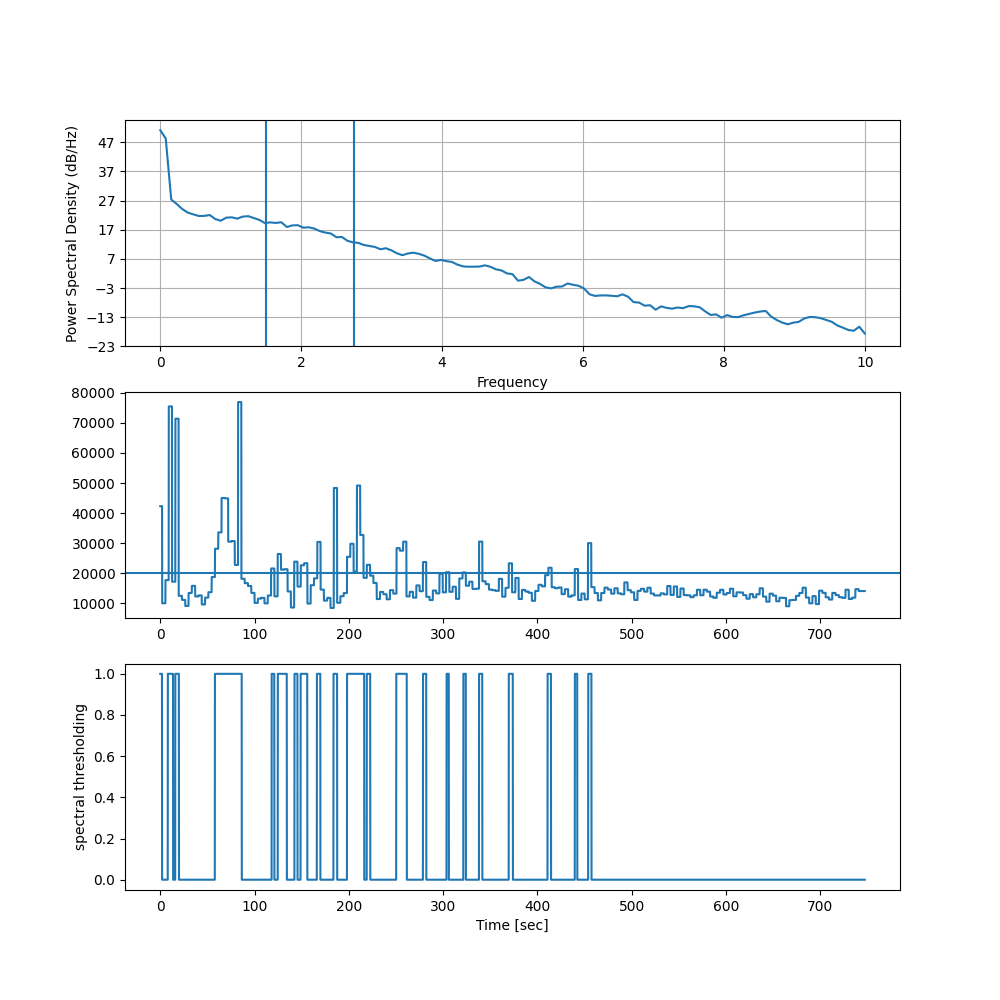

In [72]:
fig4, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10,10))
tsf = np.linspace(0, (upsampled_Sxx_stack.shape[0]*50)/1000,upsampled_Sxx_stack.shape[0])

ax0.psd(x= angles[:,6], Fs = 20)
ax0.axvline(x=gait_lower)
ax0.axvline(x=gait_upper)


ax1.plot(tsf, upsampled_Sxx_stack)
ax1.axhline(y=mean_power)

ax2.plot(tsf, upsampled_zero_hold)
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('spectral thresholding')